## Problem Statement
A US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market.

 
## Business Goals
Build a regression model in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
 1. Which variables are significant in predicting the price of a house, and
 2. How well those variables describe the price of a house.

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#import basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Data understanding and exploration

In [2]:
#read csv
housing = pd.read_csv('australia_housing.csv')

In [3]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#datatype and non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


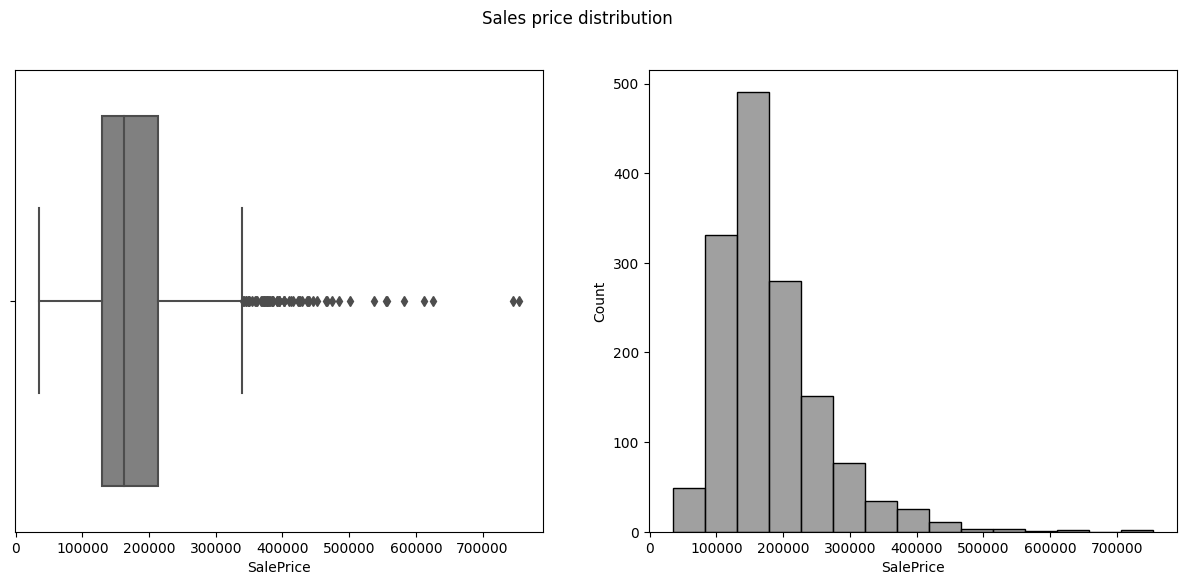

In [5]:
#target variable analysis

print(housing.SalePrice.describe())

#boxplot Sales price
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.boxplot(data=housing, x='SalePrice', ax=ax[0], color='grey')
sns.histplot(data=housing, x ='SalePrice', bins=15, ax=ax[1], color='grey')
plt.suptitle("Sales price distribution")
plt.show()

In [6]:
#target variable feature correlation
housing.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [7]:
#numeric columns
housing_numeric = housing.select_dtypes(include=['int64', 'float64'])
num_col = list(housing_numeric.columns)
print(num_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [8]:
#categorical columns
housing_objects = housing.select_dtypes(include=['object'])
cat_col = list(housing_objects.columns)
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [9]:
#null values in each feature
housing.isna().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

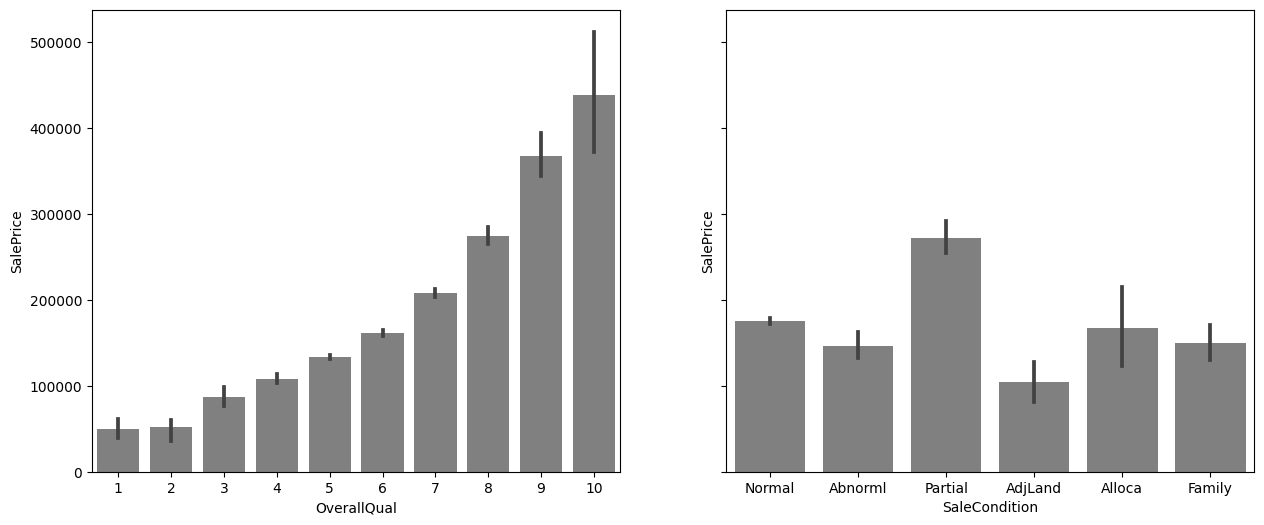

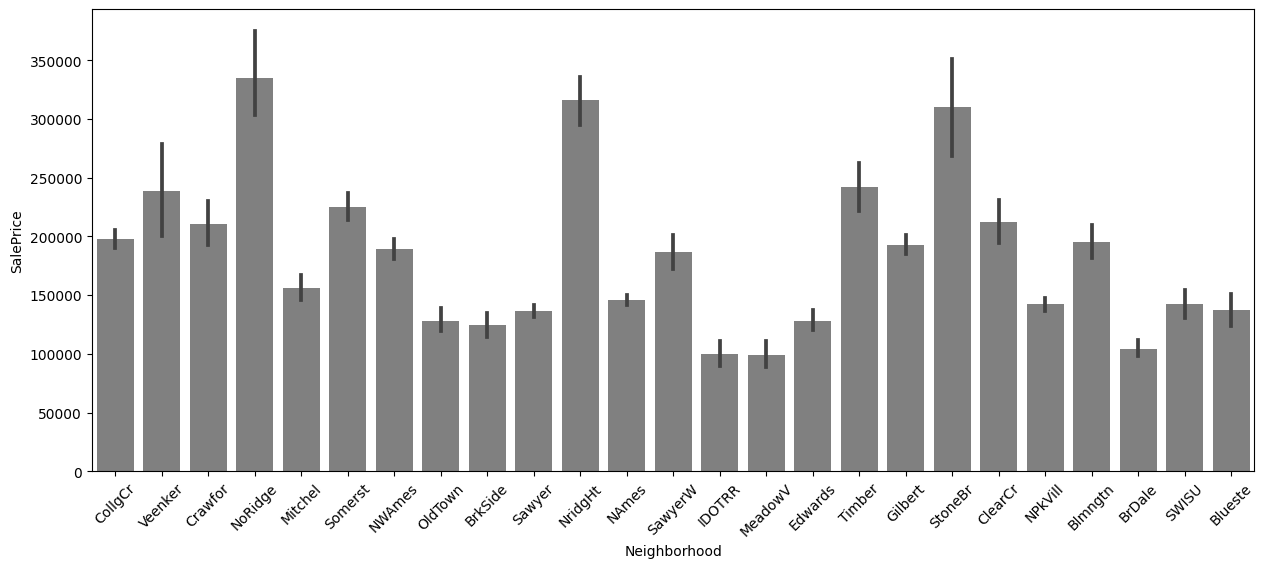

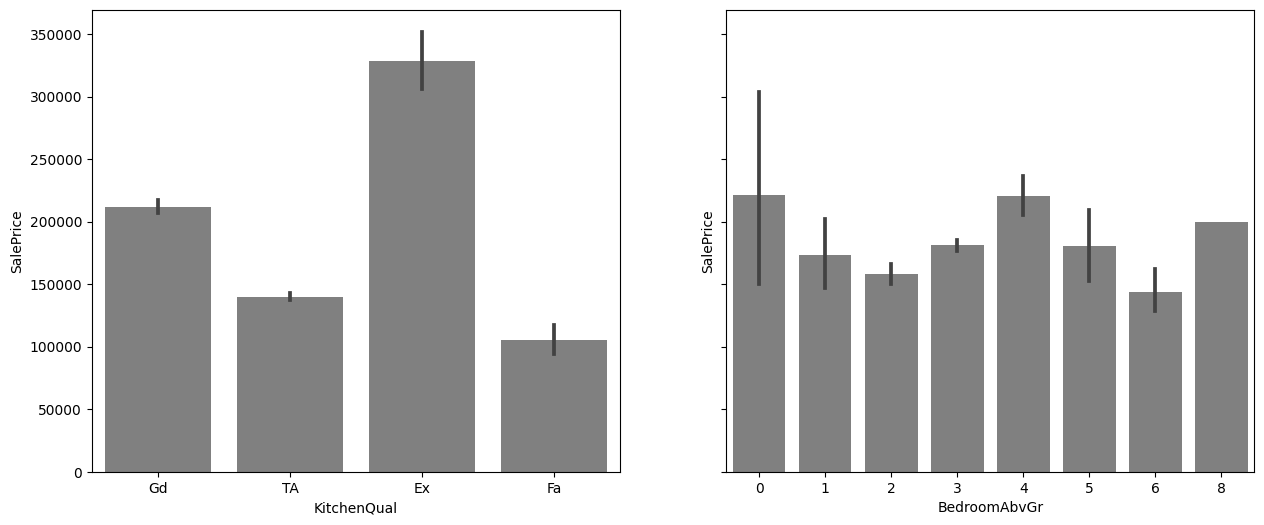

In [10]:
# relationship with sale price 
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data=housing, ax=ax[0], color='grey')
sns.barplot(x = 'SaleCondition', y = 'SalePrice', data=housing, ax=ax[1], color = 'grey')
plt.show()


plt.figure(figsize = (15,6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data=housing, color = 'grey')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.barplot(x = 'KitchenQual', y = 'SalePrice', data=housing, ax = ax[0], color = 'grey')
sns.barplot(x = 'BedroomAbvGr', y = 'SalePrice', data=housing, ax = ax[1], color = 'grey')
plt.show()

### 2. Removing extreme values

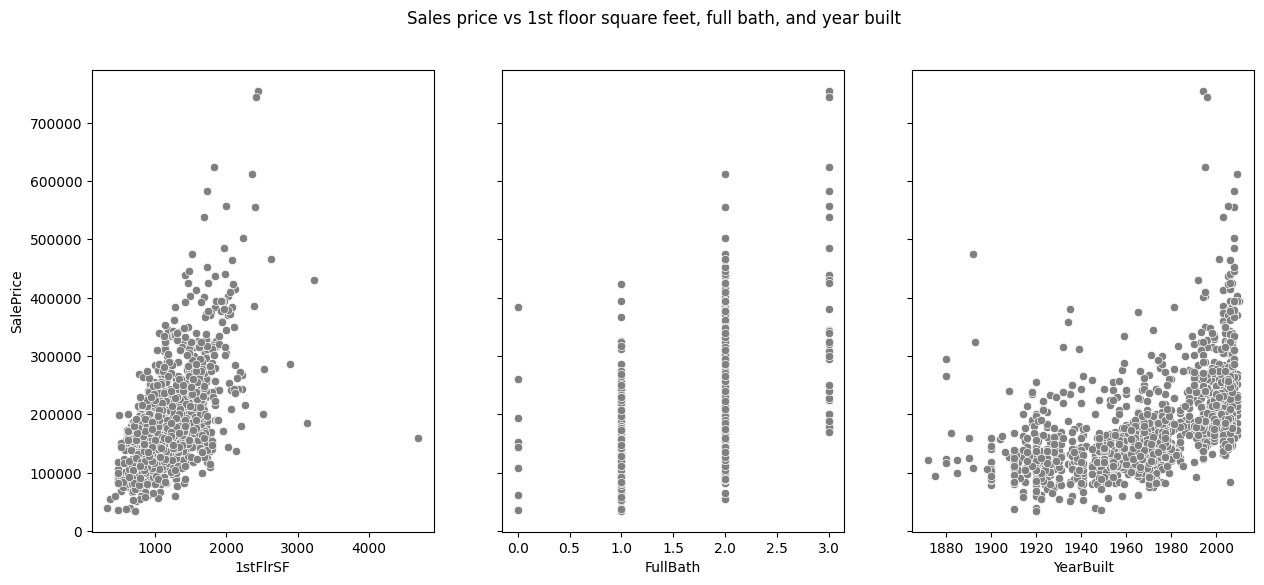

In [11]:
#checking variables that are highly correlated to sales price
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.scatterplot(x='1stFlrSF', y='SalePrice', data = housing, ax=ax[0], color='grey')
sns.scatterplot(x='FullBath', y='SalePrice', data = housing, ax=ax[1], color='grey')
sns.scatterplot(x='YearBuilt', y='SalePrice', data = housing, ax=ax[2], color='grey')
plt.suptitle("Sales price vs 1st floor square feet, full bath, and year built")
plt.show()

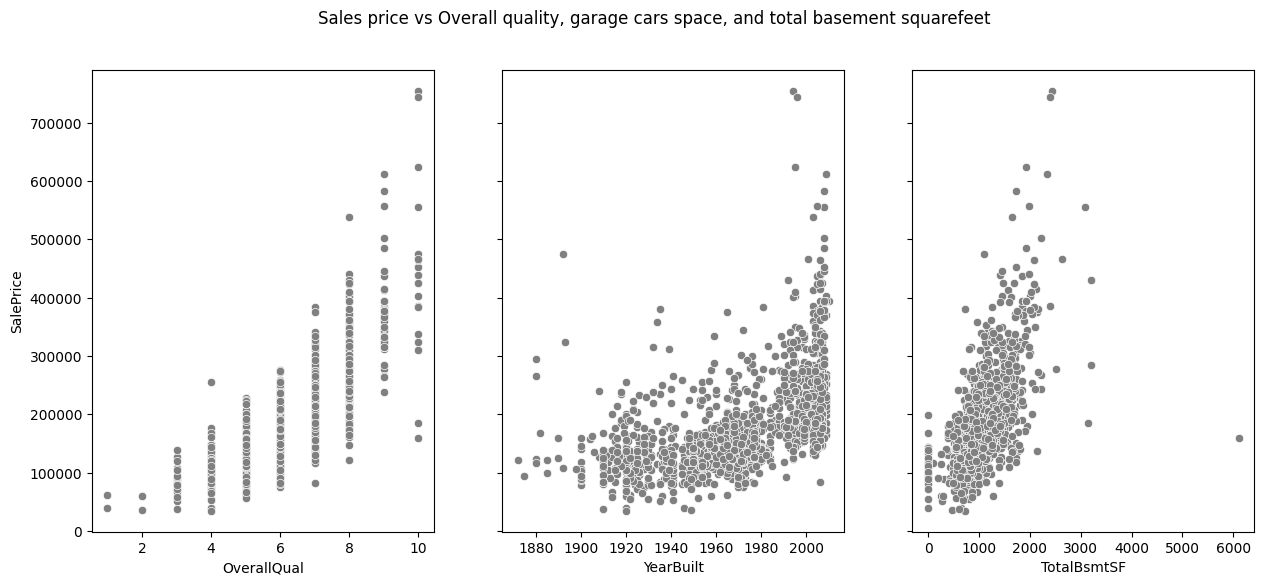

In [12]:
#checking variables that are highly correlated to sales price
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.scatterplot(x='OverallQual', y='SalePrice', data = housing, ax=ax[0], color='grey')
sns.scatterplot(x='YearBuilt', y='SalePrice', data = housing, ax=ax[1], color='grey')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data = housing, ax=ax[2], color='grey')
plt.suptitle("Sales price vs Overall quality, garage cars space, and total basement squarefeet")
plt.show()

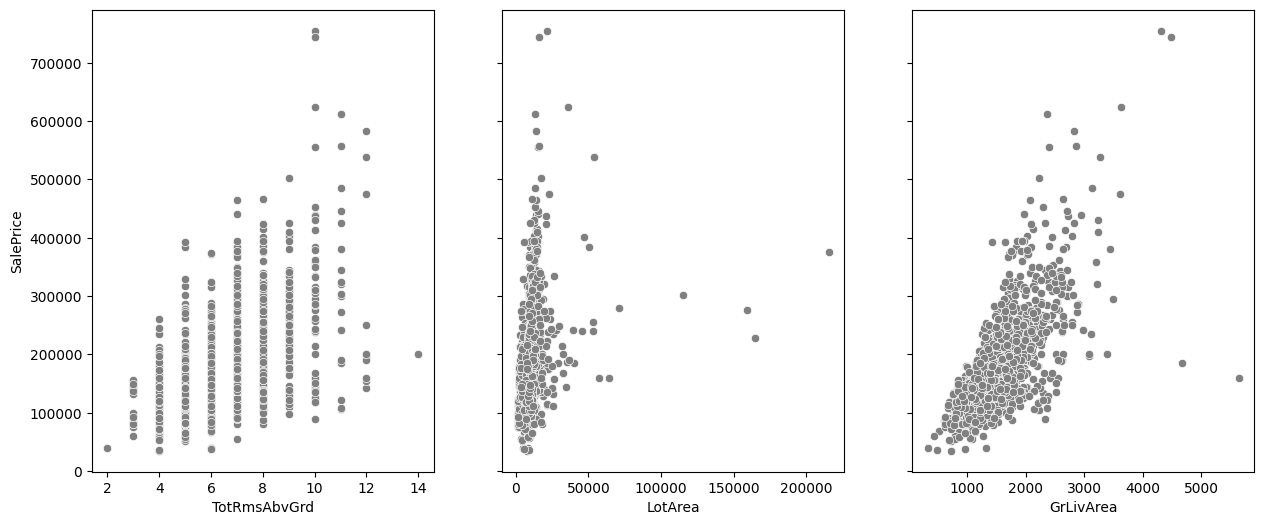

In [13]:
#visualize features 
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data = housing, ax=ax[0], color='grey')
sns.scatterplot(x='LotArea', y='SalePrice', data = housing, ax=ax[1], color='grey')
sns.scatterplot(x='GrLivArea', y='SalePrice', data = housing, ax=ax[2], color='grey')
plt.show()

In [14]:
housing.shape

(1460, 81)

In [15]:
#define a function to remove extreme values

def remove_outliers(df):
    df = df[(df.TotRmsAbvGrd < 14) & (df.TotRmsAbvGrd >2) & (df.LotArea < 100000) & (df.GrLivArea < 4000)]
    return df

In [16]:
#remove extreme values 
housing = remove_outliers(housing)

housing.shape

(1450, 81)

### 3. Dealing with Null Values

In [17]:
#percentage of null values in each feature
housing.isna().sum().sort_values(ascending=False).head(25)/len(housing.index) * 100

PoolQC          99.655172
MiscFeature     96.413793
Alley           93.793103
Fence           80.689655
FireplaceQu     47.448276
LotFrontage     17.655172
GarageYrBlt      5.448276
GarageCond       5.448276
GarageType       5.448276
GarageFinish     5.448276
GarageQual       5.448276
BsmtFinType2     2.551724
BsmtExposure     2.551724
BsmtQual         2.482759
BsmtCond         2.482759
BsmtFinType1     2.482759
MasVnrArea       0.551724
MasVnrType       0.551724
Electrical       0.068966
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64

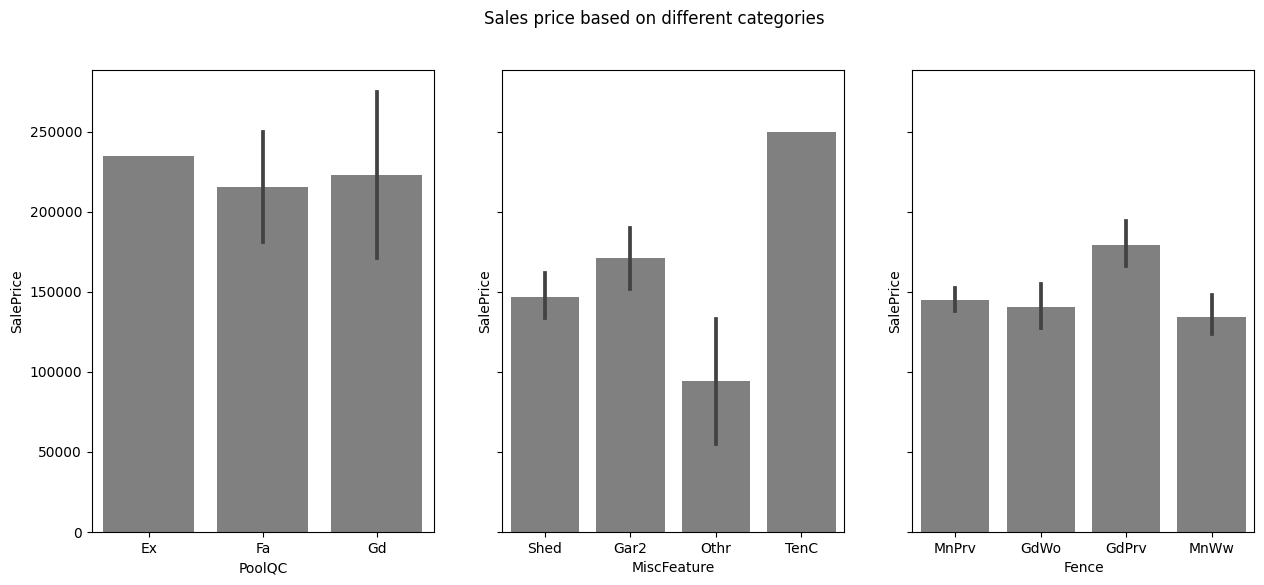

In [18]:
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.barplot(data=housing, x="PoolQC", y= "SalePrice", ax=ax[0], color='grey')
sns.barplot(data=housing, x="MiscFeature", y= "SalePrice", ax=ax[1], color='grey')
sns.barplot(data=housing, x="Fence", y= "SalePrice", ax=ax[2], color='grey')
plt.suptitle('Sales price based on different categories')
plt.show()

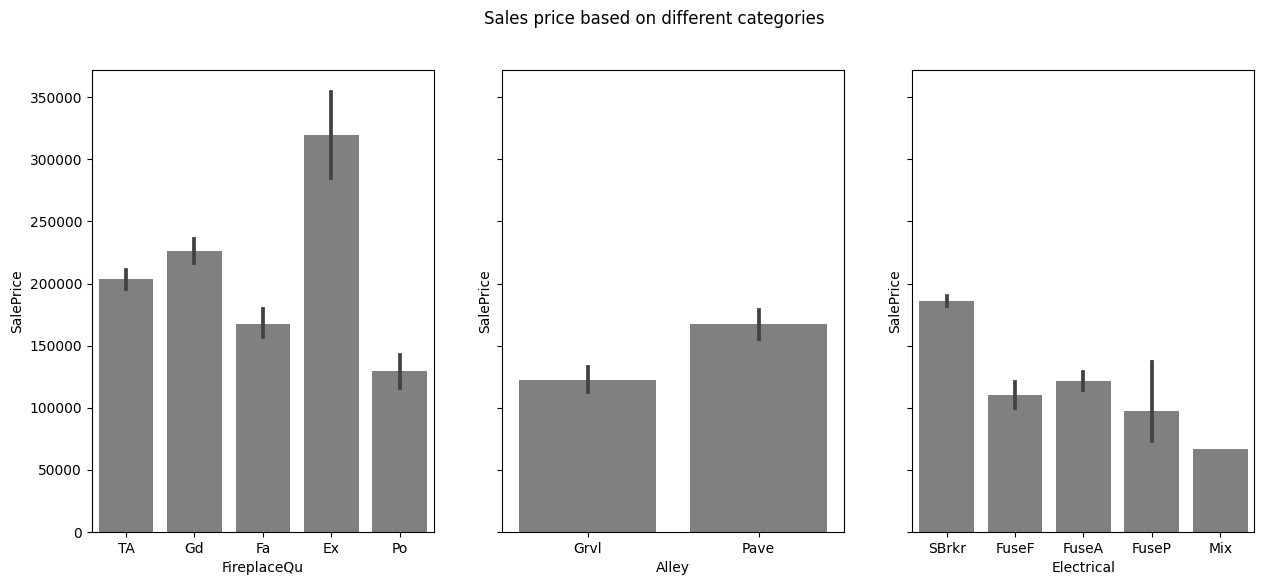

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.barplot(data=housing, x="FireplaceQu", y= "SalePrice", ax=ax[0], color='grey')
sns.barplot(data=housing, x="Alley", y= "SalePrice", ax=ax[1], color='grey')
sns.barplot(data=housing, x="Electrical", y= "SalePrice", ax=ax[2], color='grey')
plt.suptitle('Sales price based on different categories')
plt.show()

In [20]:
housing.shape

(1450, 81)

In [21]:
#As per data dictionary, NaN in all variables means 'Not available'.

#housing_objects = housing.select_dtypes(include=['object']).replace(np.nan, 'None')
#housing_numerics = housing.select_dtypes(include=['int64', 'float64']).replace(np.nan, 0)
#housing = pd.concat([housing_objects, housing_numerics], axis=1)
#housing.shape

def fix_null (df):

    # drop columns with more than 80% not available feature
    df.drop(columns = ['Fence', 'Alley', 'MiscFeature', "GarageYrBlt"], axis=1, inplace=True)
    
    #since houses with pool tend to have higher price, we will keep this feature
    df.loc[:,"PoolQC"] = df.loc[:,"PoolQC"].fillna("NoPool")
    df.loc[:,"LotFrontage"] = df.loc[:,"LotFrontage"].fillna(0)
    
    #No Basement
    df.loc[:,"BsmtQual"] = df.loc[:,"BsmtQual"].fillna("No")
    df.loc[:,"BsmtCond"] = df.loc[:,"BsmtCond"].fillna("No")
    df.loc[:,"BsmtExposure"] = df.loc[:,"BsmtExposure"].fillna("No")
    df.loc[:,"BsmtFinType1"] = df.loc[:,"BsmtFinType1"].fillna("No")
    df.loc[:,"BsmtFinType2"] = df.loc[:,"BsmtFinType2"].fillna("No")
    
    #No Garage present 
    df.loc[:,"GarageType"] = df.loc[:,"GarageType"].fillna("NoGarage")
    df.loc[:,"GarageFinish"] = df.loc[:,"GarageFinish"].fillna("NoGarage")
    df.loc[:,"GarageQual"] = df.loc[:,"GarageQual"].fillna("NoGarage")
    df.loc[:,"GarageCond"] = df.loc[:,"GarageCond"].fillna("NoGarage")
    
    #No electrical system
    df.loc[:,"Electrical"] = df.loc[:,"Electrical"].fillna("NoElectricalSys")
    
    #No Fireplace present"
    df.loc[:,"FireplaceQu"] = df.loc[:,"FireplaceQu"].fillna("NoFireplace")
    
    #Let's fill MasVnrArea to with most common value
    df['MasVnrArea'] = df['MasVnrArea'].fillna(df.MasVnrArea.value_counts().index[0])
    df.loc[:,"MasVnrType"] = df.loc[:,"MasVnrType"].fillna("None")
    

In [22]:
#applying define function to fix null values
fix_null(housing)

In [23]:
housing.shape

(1450, 77)

In [24]:
#recheck null values
housing.isna().sum().sort_values(ascending=False).head(25)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
SaleCondition    0
SaleType         0
YrSold           0
dtype: int64

### 4. Correlated features

In [25]:
#check duplicate rows
housing.duplicated().sum()

0

In [26]:
#setting id as index
housing = housing.set_index('Id')

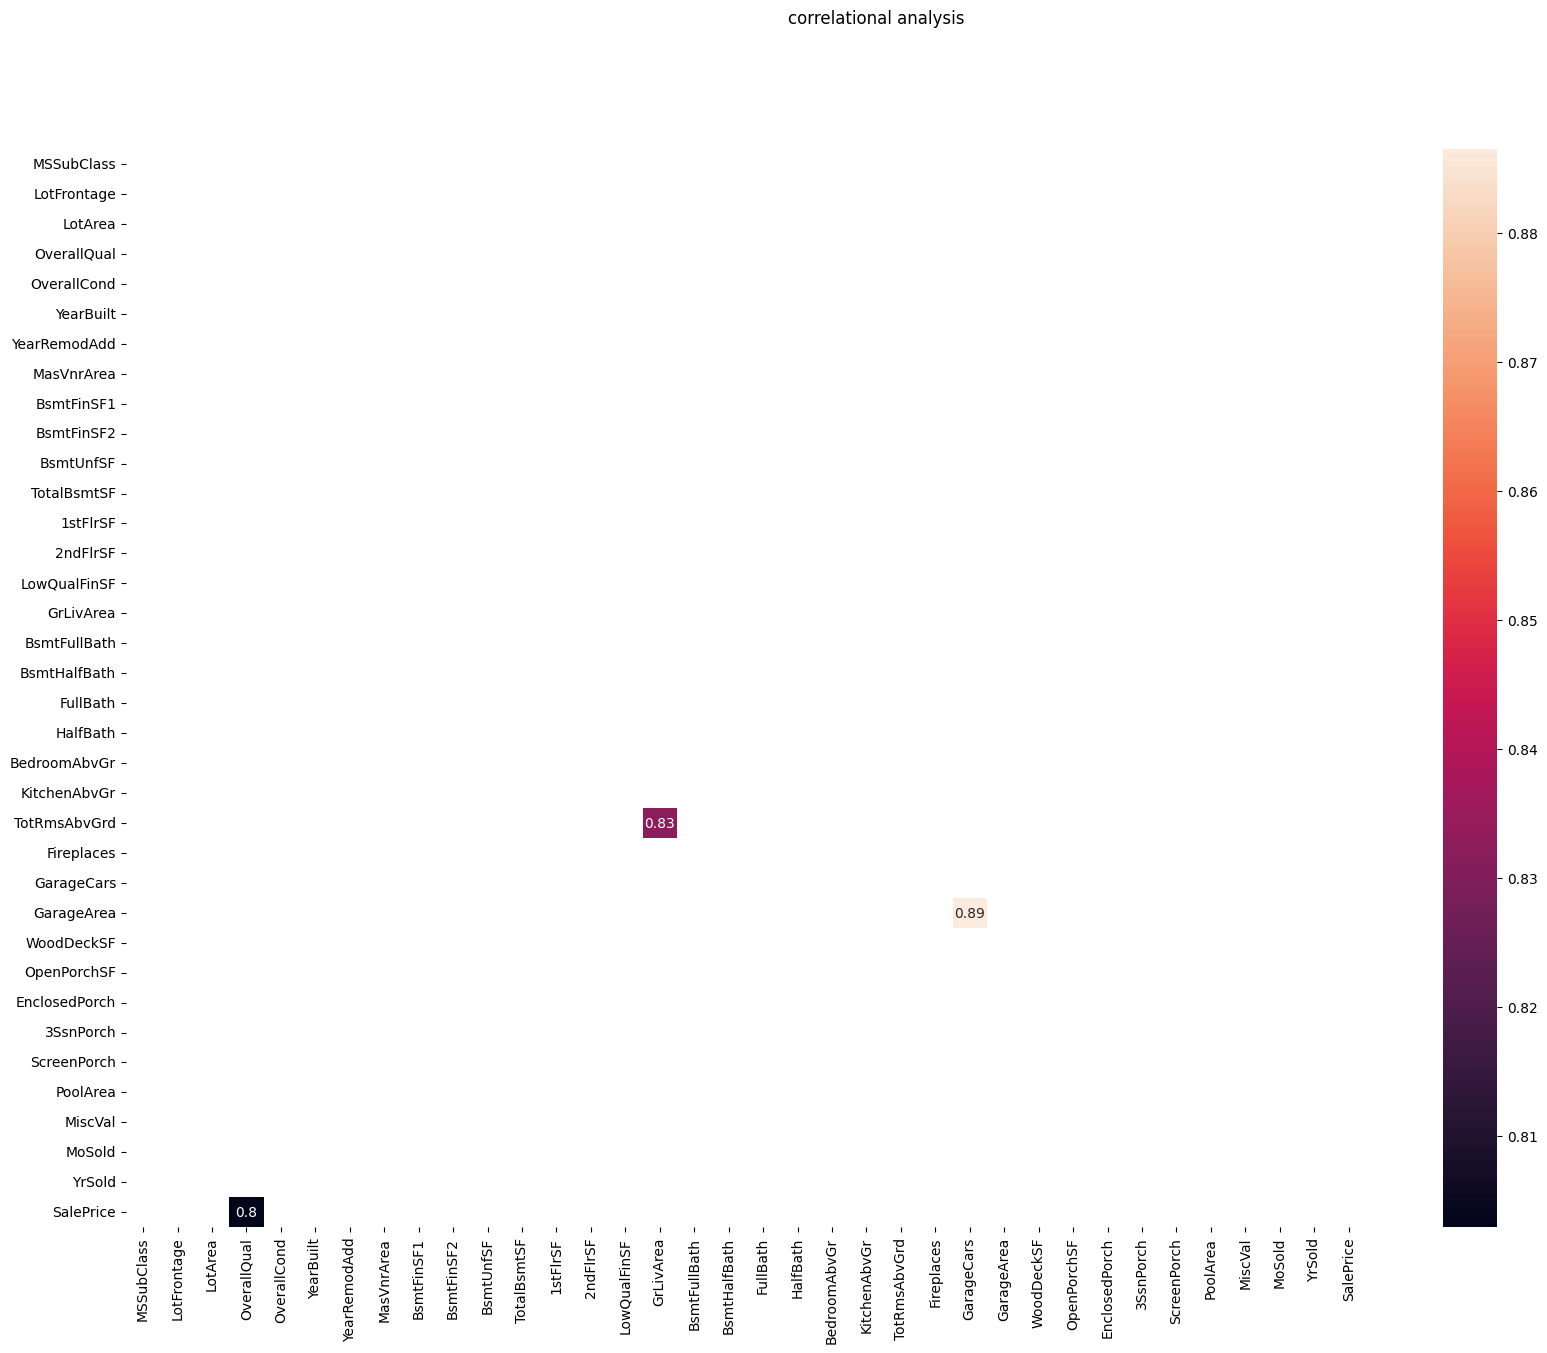

In [27]:
#correlation > 0.80
plt.figure(figsize=(20,14))
sns.heatmap(housing.corr()[housing.corr()>0.8], annot=True, mask=np.triu(housing.corr()))
plt.suptitle('correlational analysis')
plt.show()

In [28]:
housing['TotRmsAbvGrd'].corr(housing['GrLivArea'])

0.8323405026527255

In [29]:
#highly correlated features
housing['GarageCars'].corr(housing['GarageArea'])

0.8864683051869662

In [30]:
# Transform some numerical features that are actually categorical
#for column in ['OverallQual','MSSubClass','OverallCond']:
#    housing[column] = housing[column].astype('category')

# I received better rmse score without converting these features to category

In [31]:
#drop any one of highly correlated feature
housing.drop(columns = 'GrLivArea', axis=1, inplace=True)
housing.drop(columns = 'GarageCars', axis=1, inplace=True)

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1450 non-null   int64  
 1   MSZoning       1450 non-null   object 
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1450 non-null   int64  
 4   Street         1450 non-null   object 
 5   LotShape       1450 non-null   object 
 6   LandContour    1450 non-null   object 
 7   Utilities      1450 non-null   object 
 8   LotConfig      1450 non-null   object 
 9   LandSlope      1450 non-null   object 
 10  Neighborhood   1450 non-null   object 
 11  Condition1     1450 non-null   object 
 12  Condition2     1450 non-null   object 
 13  BldgType       1450 non-null   object 
 14  HouseStyle     1450 non-null   object 
 15  OverallQual    1450 non-null   int64  
 16  OverallCond    1450 non-null   int64  
 17  YearBuilt      1450 non-null   int64  
 18  YearRemo

### 5. Processing data for modeling

In [33]:
y = housing['SalePrice']
X = housing.drop('SalePrice', axis=1)

In [34]:
#numeric columns
housing_numeric = housing.select_dtypes(include=['int64', 'float64'])
num_col = list(housing_numeric.columns)

#categorical columns
housing_objects = housing.select_dtypes(include=['object'])
cat_col = list(housing_objects.columns)

In [35]:
#dummies for categorical variables
housing_dummies = pd.get_dummies(housing_objects, drop_first=True)

In [36]:
# drop categorical variables since we've created dummies
X = X.drop(housing_objects.columns, axis=1)

# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [37]:
#scaling the numerical variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#dataframe
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [38]:
X.shape

(1450, 245)

In [39]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=1)

### 7. Model Building

#### Linear Regression (using statsmodel)

In [40]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm = sm.add_constant(X_test, has_constant='add')

# basic model without feature selection
lr = sm.OLS(y_train, X_train_sm).fit()
#print(lr.summary())

In [41]:
y_train_pred_lr1 = lr.predict(X_train_sm)
y_test_pred_lr1 = lr.predict(X_test_sm)

r2_train_lr1 = r2_score(y_train, y_train_pred_lr1)
r2_test_lr1 = r2_score(y_test, y_test_pred_lr1)

mse_test_lr1 = mean_squared_error(y_test, y_test_pred_lr1)
rmse_test_lr1 = mse_test_lr1**0.5

print(f' r-squared train: {r2_train_lr1} \n r-squared test: {r2_test_lr1}\n root mean squared error: {rmse_test_lr1}')

 r-squared train: 0.9447812812415552 
 r-squared test: 0.7902876854674616
 root mean squared error: 35030.82929434923


In [42]:
# Recursive feature elimination to select 33 features out of 252 features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_sm,y_train)

rfe = RFE(lm, n_features_to_select=86)
rfe = rfe.fit(X_train_sm, y_train)

In [43]:
#del_col = X_train.columns[~rfe.support_] # to drop columns from test dataset

col = X_train_sm.columns[rfe.support_]

#apply changes to both train and validation data
X_train_sm = X_train_sm[col]
X_test_sm = X_test_sm[col]

print(X_train_sm.shape)
print(X_test_sm.shape)

(1160, 86)
(290, 86)


In [44]:
X_train_rfe = sm.add_constant(X_train_sm, has_constant='add')
X_test_rfe = sm.add_constant(X_test_sm, has_constant='add')

In [45]:
lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [46]:
y_train_pred_lr2 = lr2.predict(X_train_rfe)
y_test_pred_lr2 = lr2.predict(X_test_rfe)

r2_train_lr2 = r2_score(y_train, y_train_pred_lr2)
r2_test_lr2 = r2_score(y_test, y_test_pred_lr2)

mse_test_lr2 = mean_squared_error(y_test, y_test_pred_lr2)
rmse_test_lr2 = mse_test_lr2**0.5

print(f' r-squared train: {r2_train_lr2} \n r-squared test: {r2_test_lr2}\n root mean squared error: {rmse_test_lr2}')

 r-squared train: 0.9316943191346129 
 r-squared test: 0.8620903354866736
 root mean squared error: 28407.68233455097


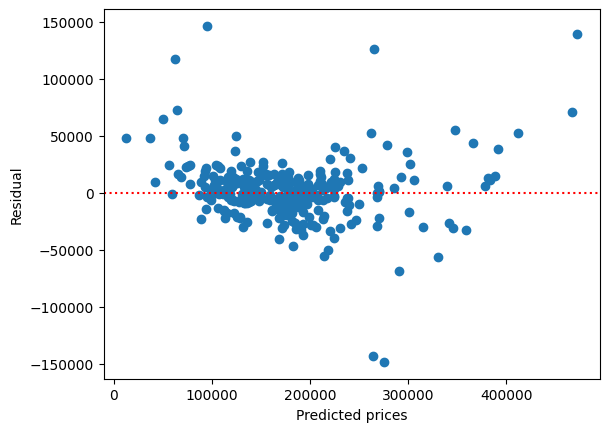

In [47]:
#residual errors
residual = y_test - y_test_pred_lr2

# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter(y_test_pred_lr2 , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted prices")
plt.ylabel("Residual")
plt.show()

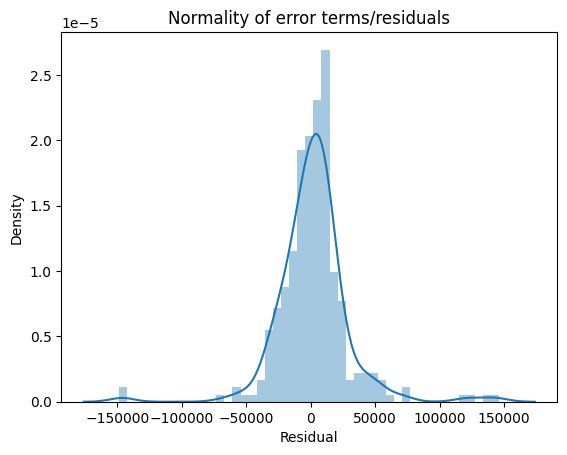

In [48]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Linear regression with polynomial transformation

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)

In [50]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_features, y,
                                                                        test_size=0.2, random_state=1)

In [51]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train_poly)

y_train_pred = poly_reg_model.predict(X_train_poly)
y_test_pred = poly_reg_model.predict(X_test_poly)

poly_r2_train = r2_score(y_train_poly, y_train_pred)
poly_r2_test = r2_score(y_test_poly, y_test_pred)

poly_mse_test = mean_squared_error(y_test_poly, y_test_pred)
poly_rmse_test = poly_mse_test**0.5

print(f' r-squared train: {poly_r2_train} \n r-squared test: {poly_r2_test}\n root mean squared error: {poly_rmse_test}')

 r-squared train: 1.0 
 r-squared test: 0.8136262509052121
 root mean squared error: 33024.08722302678


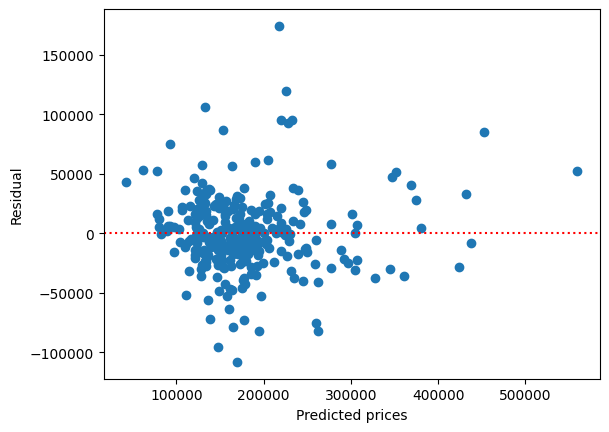

In [52]:
#residual errors
residual = y_test_poly - y_test_pred

# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter(y_test_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted prices")
plt.ylabel("Residual")
plt.show()

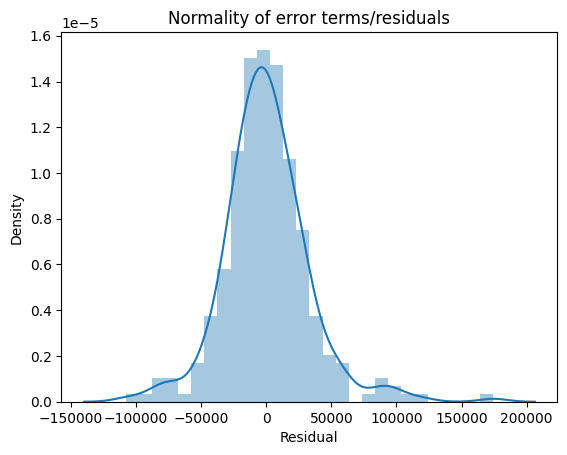

In [53]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Ridge Regression

In [54]:
#since Ridge decreases coefficient and Lasso does feature selection, I'll do train test split again to start from beginning
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=1)

In [55]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [57]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [58]:
y_train_pred_rg = ridge.predict(X_train)
y_test_pred_rg = ridge.predict(X_test)

r2_train_rg = r2_score(y_train, y_train_pred_rg)
r2_test_rg = r2_score(y_test, y_test_pred_rg)

mse_test_rg = mean_squared_error(y_test, y_test_pred_rg)
rmse_test_rg = mse_test_rg**0.5

print(f' r-squared train: {r2_train_rg} \n r-squared test: {r2_test_rg}\n root mean squared error: {rmse_test_rg}')

 r-squared train: 0.9352446989191946 
 r-squared test: 0.9087222998774261
 root mean squared error: 23111.109556539832


#### Lasso Regression

In [59]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [61]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [62]:
y_train_pred_ls = lasso.predict(X_train)
y_test_pred_ls = lasso.predict(X_test)

r2_train_ls = r2_score(y_train, y_train_pred_ls)
r2_test_ls = r2_score(y_test, y_test_pred_ls)

mse_test_ls = mean_squared_error(y_test, y_test_pred_ls)
rmse_test_ls = mse_test_ls**0.5

print(f' r-squared train: {r2_train_ls} \n r-squared test: {r2_test_ls}\n root mean squared error: {rmse_test_ls}')

 r-squared train: 0.931151189613325 
 r-squared test: 0.9120582907588001
 root mean squared error: 22684.84953765068


In [63]:
print("Number of features used(Lasso):", np.sum(lasso.coef_!=0))

Number of features used(Lasso): 119


In [64]:
compare = pd.DataFrame([[r2_train_lr1, r2_test_lr1, rmse_test_lr1], [r2_train_lr2, r2_test_lr2, rmse_test_lr2], 
            [poly_r2_train, poly_r2_test, poly_rmse_test], [r2_train_rg, r2_test_rg, rmse_test_rg], 
            [r2_train_ls, r2_test_ls, rmse_test_ls]],
            columns = ['Train R2 score', 'Test R2 score', 'RMSE'], 
            index = ['Linear Regression (base)', 'Linear Regression (RFE)', 
                     'Linear Regression (Polynomial)', 'Ridge Regression', 'Lasso Regression'])

compare

,Train R2 score,Test R2 score,RMSE
Linear Regression (base),0.944781,0.790288,35030.829294
Linear Regression (RFE),0.931694,0.862090,28407.682335
Linear Regression (Polynomial),1.000000,0.813626,33024.087223
Ridge Regression,0.935245,0.908722,23111.109557
Lasso Regression,0.931151,0.912058,22684.849538


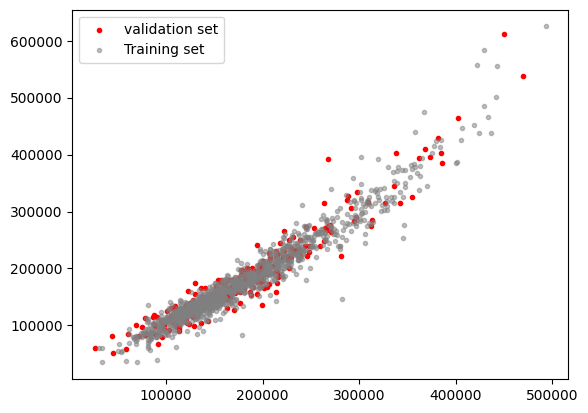

In [65]:
# Plot the linear model
plt.scatter(y_test_pred_ls, y_test, color='red', marker='.', label = "validation set")
plt.scatter(y_train_pred_ls, y_train, color='grey', marker='.', label = "Training set", alpha=0.5)
plt.legend()
plt.show()

### Top 10 important features

In [66]:
a = pd.DataFrame(X_train.columns)
b = pd.DataFrame(lasso.coef_)

In [67]:
coefficients = pd.concat([a,b], axis=1)
coefficients.columns = ['Features','Coefficient']

In [68]:
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

,Features,Coefficient
13,2ndFlrSF,21200.198441
12,1stFlrSF,17926.455190
3,OverallQual,12912.818963
5,YearBuilt,8488.949606
11,TotalBsmtSF,8296.599102
8,BsmtFinSF1,6175.124465
2,LotArea,6064.669699
23,GarageArea,5573.551877
4,OverallCond,5389.654500
237,SaleType_New,5287.097342


## Question 3:
#### Remove top 5 features and find next 5 top features


In [69]:
X_train_new = X_train.drop(columns = ['2ndFlrSF', '1stFlrSF', 'OverallQual', 'YearBuilt', 'TotalBsmtSF'], axis=1)

In [70]:
X_test_new = X_test.drop(columns = ['2ndFlrSF', '1stFlrSF', 'OverallQual', 'YearBuilt', 'TotalBsmtSF'], axis=1)

In [71]:
lasso_new = Lasso()

# cross validation
model_cv_new = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
print(model_cv_new.best_params_)

{'alpha': 500}


In [73]:
alpha =500

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [74]:
y_train_pred_ls = lasso_new.predict(X_train_new)
y_test_pred_ls = lasso_new.predict(X_test_new)

r2_train_ls = r2_score(y_train, y_train_pred_ls)
r2_test_ls = r2_score(y_test, y_test_pred_ls)

mse_test_ls = mean_squared_error(y_test, y_test_pred_ls)
rmse_test_ls = mse_test_ls**0.5

print(f' r-squared train: {r2_train_ls} \n r-squared test: {r2_test_ls}\n root mean squared error: {rmse_test_ls}')

 r-squared train: 0.9157749938882906 
 r-squared test: 0.894850719898659
 root mean squared error: 24805.135498157662


In [75]:
c = pd.DataFrame(X_train_new.columns)
d = pd.DataFrame(lasso_new.coef_)

In [76]:
coefficients = pd.concat([c,d], axis=1)
coefficients.columns = ['Features','Coefficient']

coefficients.sort_values(by='Coefficient', ascending=False)

,Features,Coefficient
6,BsmtFinSF1,20435.829953
8,BsmtUnfSF,14814.499322
16,TotRmsAbvGrd,12940.818728
18,GarageArea,9214.684732
12,FullBath,6399.187228
...,...,...
141,ExterQual_TA,-5759.087165
190,KitchenQual_Gd,-7709.274238
191,KitchenQual_TA,-10066.766040
152,BsmtQual_Gd,-11939.256591
